In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


/home/sourabh/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Clearly seen that 78% of data in Cabin feature are empty or Null.Thus we can drop this column as this will not give any insight 
* In Age Feature 20% of data is Null Value . We can Impute this Value . We can't drop this feature as this could be the important feature because more the age less the chances of survival (Just a common Thought)
* In Embarked Feature has 2 Null Value So In this case we could Impute the null value with most occurence value or we can drop the 2 rows from entire dataset. Will Not Impact that much 


In [ ]:
data=data.drop(['Cabin'],axis=1)

In [8]:
##########  MISSING VALUES HANDLING ###########

<AxesSubplot:xlabel='Pclass', ylabel='count'>

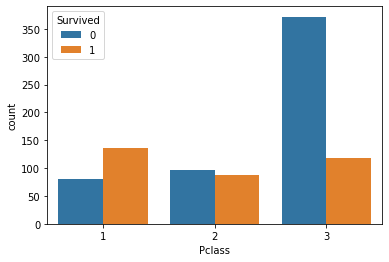

In [12]:
sns.countplot(x='Pclass',hue='Survived',data=data)


<BarContainer object of 891 artists>

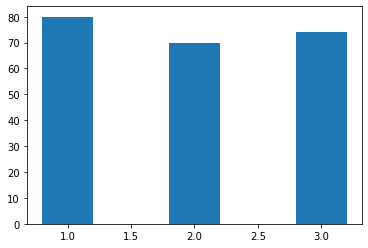

In [20]:
plt.bar(x=data.Pclass, height=data.Age,width=0.4)


In [49]:

print("Passengers from 3 rd Category and they Fail to Survived . Their average mean is ",  data[(data['Pclass']==3) & (data['Survived']==0)]['Age'].mean())
print("Passengets from 3 rd category and they survive . their Average age is",data[(data['Pclass']==3) & (data['Survived']==1)]['Age'].mean())

print("Passengers from 2 nd Category and they Survive . Their Average Age is ",data[(data['Pclass']==2) & (data['Survived']==1)]['Age'].mean())
print("Passengers from 2 nd Category and they  Fail to Survive . Their Average Age is ",data[(data['Pclass']==2) & (data['Survived']==0)]['Age'].mean())


print("Passengers from 1 st Category and they Survive . Their Average Age is ",data[(data['Pclass']==1) & (data['Survived']==1)]['Age'].mean())
print("Passengers from 1 st Category and they Fail to Survive . Their Average Age is ",data[(data['Pclass']==1) & (data['Survived']==0)]['Age'].mean())

Passengers from 3 rd Category and they Fail to Survived . Their average mean is  26.555555555555557
Passengets from 3 rd category and they survive . their Average age is 20.646117647058823
Passengers from 2 nd Category and they Survive . Their Average Age is  25.90156626506024
Passengers from 2 nd Category and they  Fail to Survive . Their Average Age is  33.544444444444444
Passengers from 1 st Category and they Survive . Their Average Age is  35.36819672131148
Passengers from 1 st Category and they Fail to Survive . Their Average Age is  43.6953125


* Passengers from 1 st category on average who survive or not are MID-Aged Persons This Data could be helpfull for filling the Missing values in AGE feature 
* Passengers from 3rd category who survive are Genreally Youngsters(acc. to data) and this shows that survival chances of youngster are more 
* Overall Maximum death are from 3 rd category. Just a Basic thing because of Low class.


In [51]:

############ imputing the missing values in Age column ###################
data.loc[(data['Survived']==0) & (data['Pclass']==3) ,'Age']=data['Age'].fillna(data[(data['Pclass']==3) & (data['Survived']==0)]['Age'].mean())

data.loc[(data['Survived']==1) & (data['Pclass']==3) ,'Age']=data['Age'].fillna(data[(data['Pclass']==3) & (data['Survived']==1)]['Age'].mean())


data.loc[(data['Survived']==0) & (data['Pclass']==2) ,'Age']=data['Age'].fillna(data[(data['Pclass']==2) & (data['Survived']==0)]['Age'].mean())
data.loc[(data['Survived']==1) & (data['Pclass']==2) ,'Age']=data['Age'].fillna(data[(data['Pclass']==2) & (data['Survived']==1)]['Age'].mean())


data.loc[(data['Survived']==0) & (data['Pclass']==1) ,'Age']=data['Age'].fillna(data[(data['Pclass']==1) & (data['Survived']==0)]['Age'].mean())
data.loc[(data['Survived']==1) & (data['Pclass']==1) ,'Age']=data['Age'].fillna(data[(data['Pclass']==1) & (data['Survived']==1)]['Age'].mean())



<AxesSubplot:xlabel='Embarked', ylabel='count'>

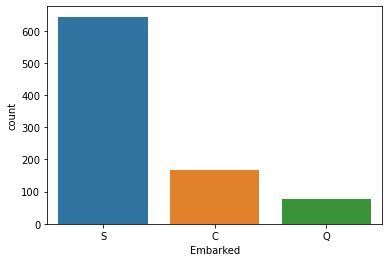

In [62]:
##handling Embarked missing Values
sns.countplot(x='Embarked',data=data)

* Most of the Passengers was boarded from Southhampton  So we can fill these 2 Empty Row with Southhampton as a assumption 


In [66]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
##No missing Values after this 

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now There is no missing Values in Data .


# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

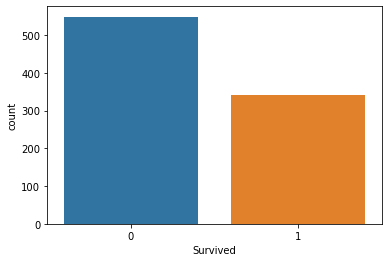

In [70]:
sns.countplot(x='Survived',data=data)

Totally Imbalance Dataset This will Give Bias Result . So have to handle it using oversampling or undersampling  

In [71]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

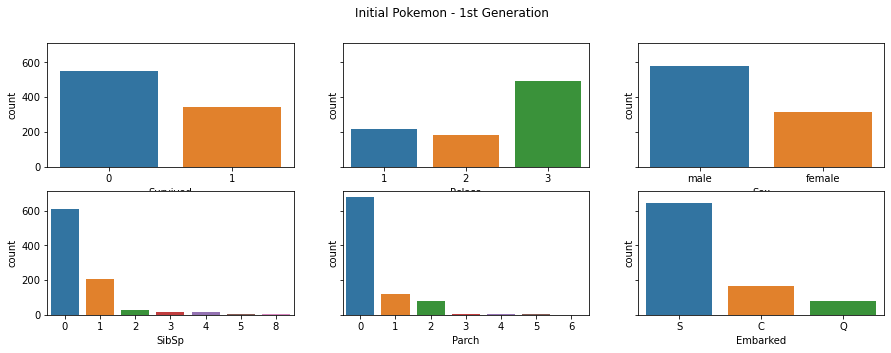

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('All Category Columns')

# Bulbasaur
sns.countplot(ax=axes[0][0], x=data.Survived)

sns.countplot(ax=axes[0][1], x=data.Pclass)

sns.countplot(ax=axes[0][2], x=data.Sex)

sns.countplot(ax=axes[1][0], x=data.SibSp)

sns.countplot(ax=axes[1][1], x=data.Parch)
sns.countplot(ax=axes[1][2], x=data.Embarked)


* Most of the Passengers are from 3rd class
* There are more Male passengers then female 
* Most of the passengers are alone 0 and some are with 1 person 
* Most of the customers boarded from Sothhampton 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

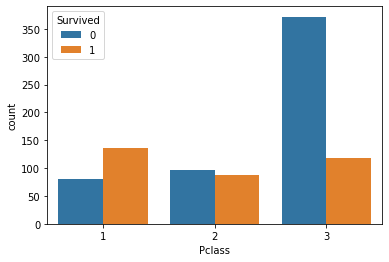

In [103]:
sns.countplot(x='Pclass',hue='Survived',data=data)

* Most of the 3rd class passenger fail to survive while most passengers form 1 st class survived 

<AxesSubplot:xlabel='Sex', ylabel='count'>

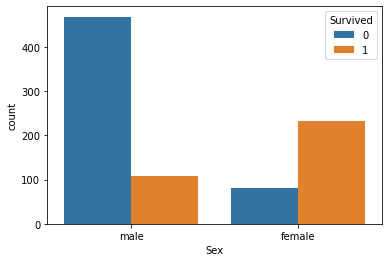

In [116]:
sns.countplot(x='Sex',hue='Survived',data=data)

Data Shows most number of female Survives and Most number of male were died 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

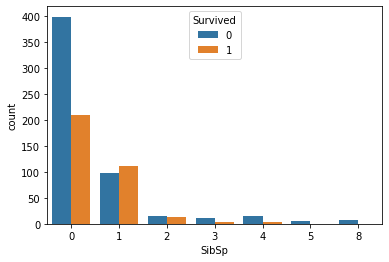

In [117]:
sns.countplot(x='SibSp',hue='Survived',data=data)

 Passengers who are alone Survived more and passengers with large groups died more 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

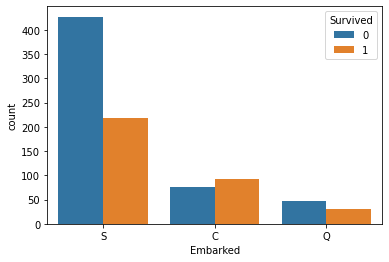

In [118]:
sns.countplot(x='Embarked',hue='Survived',data=data)

Most passengers who are from southhampton died most and Mostly Who boarded from Cherbourg Survived

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

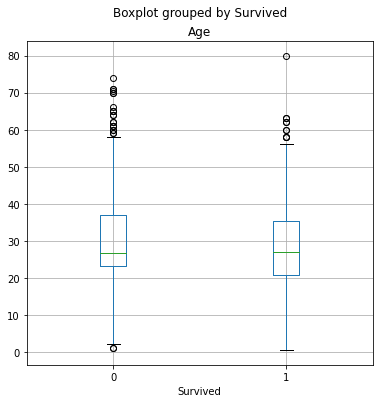

In [124]:
data.boxplot(column='Age',by='Survived',figsize=(6,6))


In this basically Values from above 55 are outliers. We can remove It or can see if that affecting our results or not 


In [129]:
print("not survived",(data[data['Age']>55]['Survived']==0).sum())
print("Survived",(data[data['Age']>55]['Survived']==1).sum())



not survived 28
Survived 12


Data Shows more the Age is less the Chance of Survival 

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

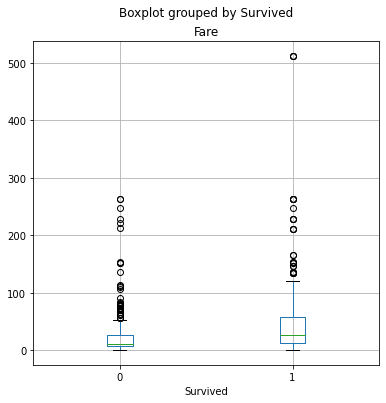

In [130]:
data.boxplot(column='Fare',by='Survived',figsize=(6,6))


<AxesSubplot:>

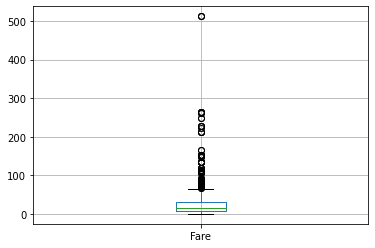

In [133]:
data.boxplot(column='Fare')

* Both These Boxplots shows the outliers.
* Boxplot 1 Shows Higher the Fare more the chance of Survival 
* Boxplot 2 shows the overall impact of Fare .


In [164]:
print('Not Survived',(data[data['Fare']>60]['Survived']==0).sum())
print('Survived',(data[data['Fare']>60]['Survived']==1).sum())


Not Survived 40
Survived 82


<AxesSubplot:ylabel='Frequency'>

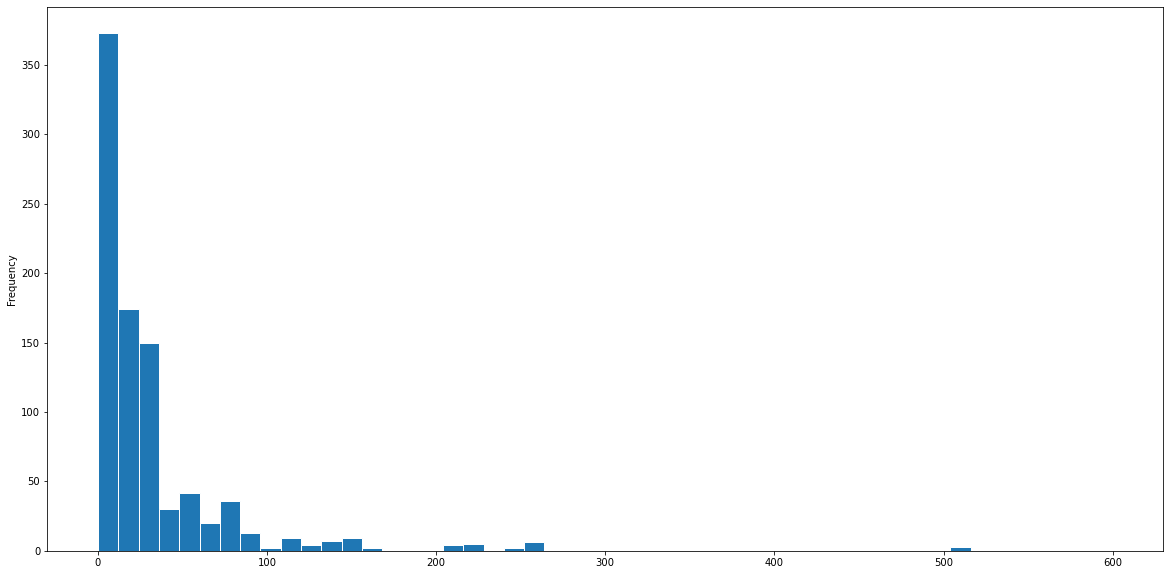

In [168]:
(data['Fare']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,600])


As this distribution also shows the outliers and making a SKEWED Data , with right tail by taking log could have improve the normalcy of the data 

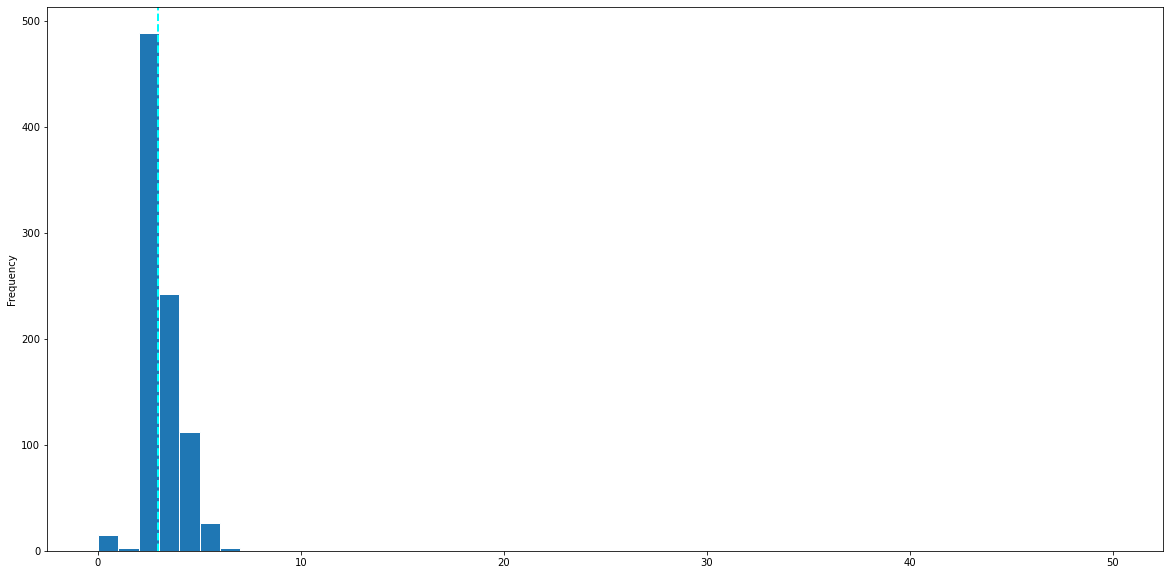

In [451]:
np.log((data['Fare']+1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,50])
mean_val =np.log( data['Fare'] +1).mean()
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)


Normlacy of the data improved a little much but not of good level 


<AxesSubplot:ylabel='Density'>

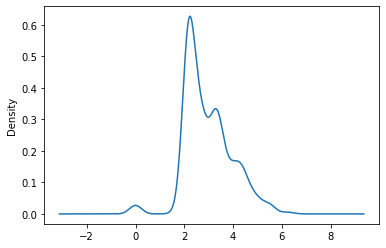

In [183]:
np.log(data['Fare']+1).plot.density()


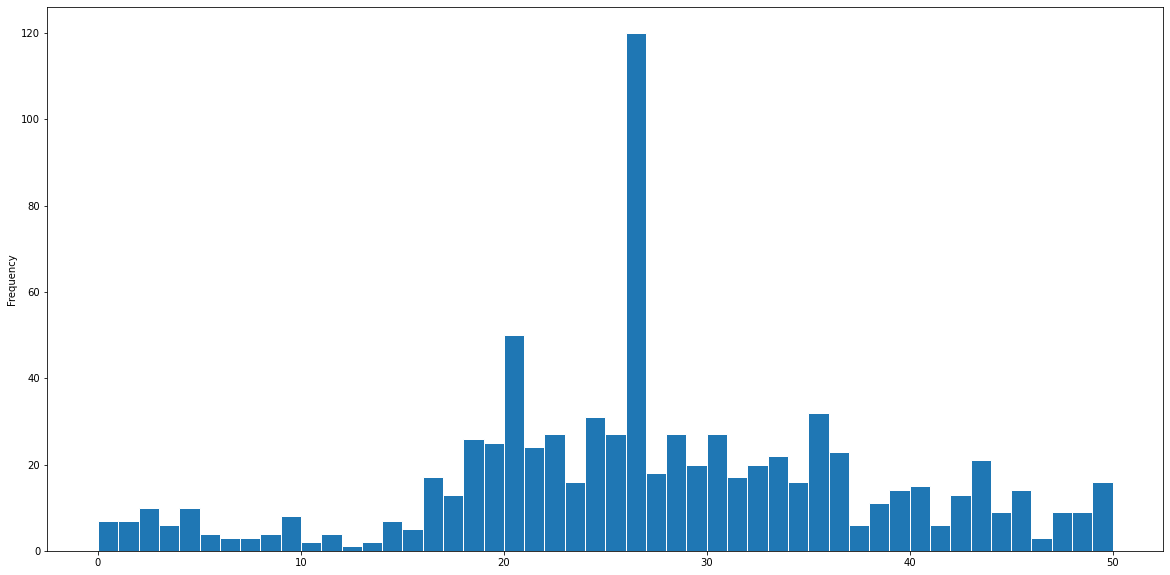

In [452]:
((data['Age'])).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,50])


<AxesSubplot:ylabel='Density'>

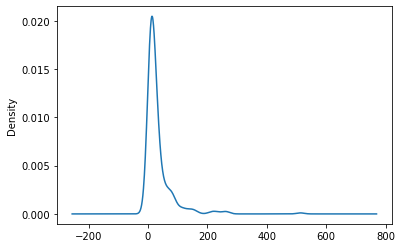

In [190]:
(data['Fare']+1).plot.density()


<AxesSubplot:ylabel='Frequency'>

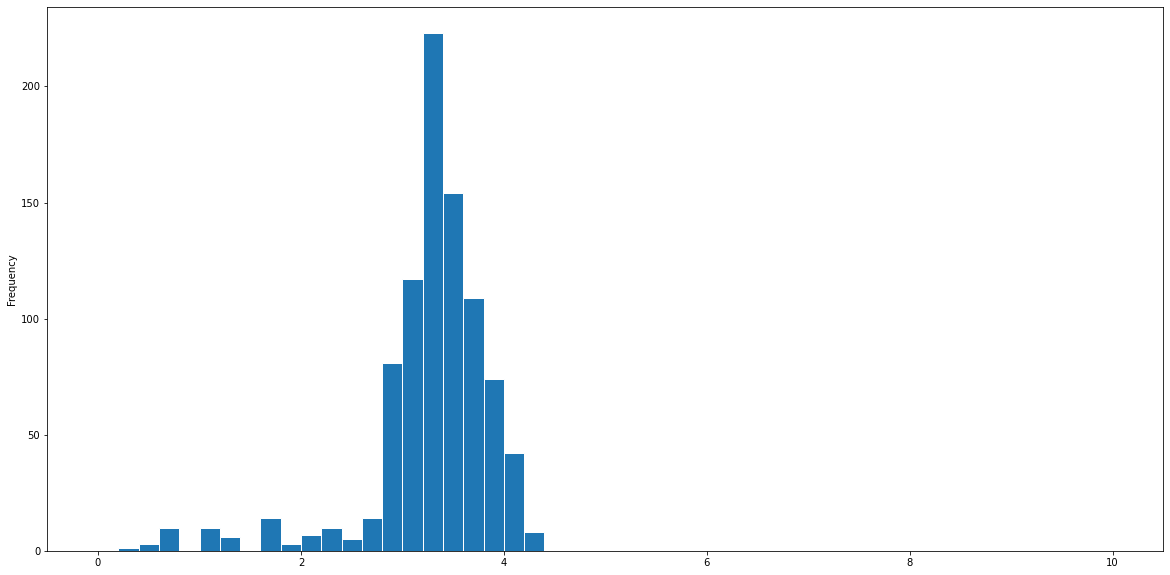

In [188]:
(np.log(data['Age']+1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,10])


<AxesSubplot:ylabel='Density'>

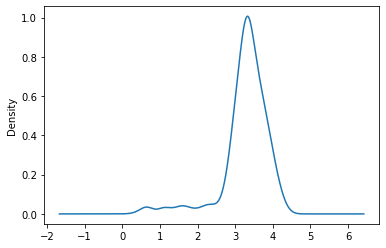

In [189]:
np.log(data['Age']+1).plot.density()


In [454]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


In [455]:
print("number of Outliers of Fare ",data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))]['Fare'].count())
print("number of outliers of Age  ",data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))]['Age'].count())

number of Outliers of Fare  31
number of outliers of Age   63


In [201]:
######Making new Feature #####


data['alone_calculate']= data['Parch'] + data['SibSp']
data.loc[data['alone_calculate'] > 0, 'alone'] = 0   # no You should not travel alone
data.loc[data['alone_calculate'] ==0,'alone']=1      # yes you can travel alone

data=data.drop(['alone_calculate'],axis=1)


* As SibSp and Parch Features have almost same meaning . Whether you are with sibling or spouse or whether you are with parents or child 
* if we merge these two columns then It will give more insigtfull data

In [202]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,alone
PassengerId,1.000000,-0.005007,-0.035144,0.042145,-0.057527,-0.001652,0.012658,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.089527,-0.035322,0.081629,0.257307,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.407702,0.083081,0.018443,-0.549500,0.135207
Age,0.042145,-0.089527,-0.407702,1.000000,-0.240426,-0.175105,0.120143,0.179461
SibSp,-0.057527,-0.035322,0.083081,-0.240426,1.000000,0.414838,0.159651,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.175105,0.414838,1.000000,0.216225,-0.583398
Fare,0.012658,0.257307,-0.549500,0.120143,0.159651,0.216225,1.000000,-0.271832
alone,0.057462,-0.203367,0.135207,0.179461,-0.584471,-0.583398,-0.271832,1.000000


by this We can say SibSp(corr of -0.03) and Parch(coll of -0.08) with combine alone is giving alone(corr of -0.20) more relation with dependent variable 


In [203]:
##Now we can drop sibsp and Parch 
data=data.drop(['SibSp','Parch'],axis=1)


In [207]:
####Converting obejct Variable into integer variable ########
###### By label encoding according to  max frequency ##########

a={'male':0,'female':1}
b={'S':0,'C':1,'Q':2}

data['Sex']=data['Sex'].map(a)
data['Embarked']=data['Embarked'].map(b)

In [220]:
###### Finding Correlation of Categorical Columns ######
######Using Chi Square Test ###################

category=['Pclass','Sex','Embarked','alone']
dependent=['Survived']


train=data[category]
target=data['Survived']


from sklearn.feature_selection import chi2
stats,p_values=chi2(train,target)



In [221]:
p_value=pd.Series(p_values)
p_value.index=category

array([2.75378563e-08, 6.21058490e-39, 7.53214554e-04, 1.30068490e-04])

In [228]:
p_value.sort_values()

Sex         6.210585e-39
Pclass      2.753786e-08
alone       1.300685e-04
Embarked    7.532146e-04
dtype: float64

This Correlation Shows that Sex Feature is the most related column to the Category 


In [243]:
##### As in Name , passenger Id, column all has unique name so this will not give any meanig full insights 
######So i am dropping the Name , Passenger Column ###########

data=data.drop(['Name','PassengerId'],axis=1)


In [247]:
data=data.drop(['PassengerId'],axis=1)

In [275]:
data['Ticket']=data['Ticket'].apply(lambda x: 0 if x.isnumeric() == False else 1)
###taking 1 for  ticket value which contain some only numeric ( may be of low class)
####and 0 for which contain some alphabets(because these tickets could be for Rich people)

<AxesSubplot:xlabel='Ticket', ylabel='count'>

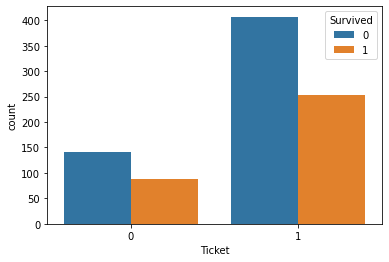

In [284]:
sns.countplot(x='Ticket',hue='Survived',data=data)

In [282]:
stats,p_value=chi2(data.iloc[:,4:5],target)
print(stats,p_value)

[0.00051168] [0.98195306]


Shows Very less correlation and it does not making any sense here 

In [283]:
data.corr()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,alone
Survived,1.000000,-0.338481,0.543351,-0.089527,0.001492,0.257307,0.106811,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.407702,0.079763,-0.549500,0.045702,0.135207
Sex,0.543351,-0.131900,1.000000,-0.104367,0.032507,0.182333,0.116569,-0.303646
Age,-0.089527,-0.407702,-0.104367,1.000000,-0.047508,0.120143,-0.053792,0.179461
Ticket,0.001492,0.079763,0.032507,-0.047508,1.000000,-0.173170,0.081222,0.003247
Fare,0.257307,-0.549500,0.182333,0.120143,-0.173170,1.000000,0.062142,-0.271832
Embarked,0.106811,0.045702,0.116569,-0.053792,0.081222,0.062142,1.000000,0.017807
alone,-0.203367,0.135207,-0.303646,0.179461,0.003247,-0.271832,0.017807,1.000000


Ticket and Survived are very less correlated 

In [286]:
###droppping Ticket feature alse

data=data.drop(['Ticket'],axis=1)

In [297]:
target=data['Survived']
data=data.drop(['Survived'],axis=1)

In [456]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3)


In [457]:
y_train.value_counts()

# as this is the imbalance dataset so I will gonna use 

0    381
1    242
Name: Survived, dtype: int64

In [458]:
from imblearn.over_sampling import SMOTENC    #using smote nc because I have categorical data also 

smotenc = SMOTENC([0,1,4,5],random_state = 101)   # Givning the particular value of categorical Column 
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)


In [459]:
####### Scaling the features so that all of the values will be in same scale  ###################
######## Important for distance based algorithm because it will affect the model and make it more shifted towards
########  the highest distnace point .So best fit line will be affect So it is better to scale all the features ##########
from sklearn.preprocessing import StandardScaler as ss
ss=ss()
X_feature_scaling=ss.fit_transform(X_oversample)
X_test_scaling=ss.transform(X_test)



In [460]:
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.metrics import accuracy_score,confusion_matrix

lr=lr()
lr.fit(X_feature_scaling,y_oversample)
pr=lr.predict(X_test_scaling)

print(accuracy_score(pr,y_test))
print(confusion_matrix(pr,y_test))

0.8022388059701493
[[136  21]
 [ 32  79]]


In [461]:
## now Finding Which Threshold is best ######

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred=lr.predict_proba(X_test_scaling)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred)



In [462]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
23,0.677640,0.828358
27,0.610905,0.820896
26,0.613575,0.820896
24,0.648595,0.820896
25,0.618534,0.817164


Thresholds with 0.63 is used insted of 0.5(standard)[](http://)

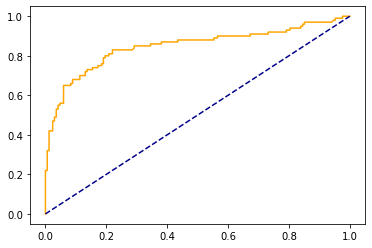

In [463]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [464]:
######################################

import xgboost 

xg=xgboost.XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='error')

xg.fit(X_oversample, y_oversample)
pred=xg.predict(X_test)
print(accuracy_score(pred,y_test))

print(confusion_matrix(y_test,pred))



0.8059701492537313
[[142  26]
 [ 26  74]]


<BarContainer object of 6 artists>

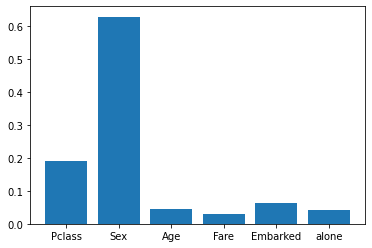

In [465]:
feature_importance=xg.feature_importances_
plt.bar(x=X_oversample.columns,height=feature_importance)


* It is clearly seen from the bar That sex column is more imoprtant then any other column
* other column has approx equal number of weightage 

In [466]:
###### HYPER PARAMETER TUNING ###########
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,  #learning parameter Gradient descent ETA 
 "max_depth"        : [ 3, 4, 5],    #depth of the tree
 "min_child_weight" : [ 1, 3, 5, 7 ],  #cover Value for Classification problem 
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],  #for pruning of tree
 'reg_lambda':        [0,1.0,10.0], #regularization parameter 
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],   #subsample ratio of column 
    }
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)


In [467]:
random_search.fit(X_oversample,y_oversample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='error', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact

In [468]:
random_search.best_params_

{'reg_lambda': 10.0,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [469]:
xg1=xgboost.XGBClassifier(reg_lambda= 10,
 min_child_weight=5,
 max_depth= 5,
 learning_rate= 0.25,
 gamma=0.3,
 colsample_bytree=0.7,
objective='binary:logistic',use_label_encoder=False,eval_metric='error')

In [470]:
xg1.fit(X_oversample, y_oversample)

pred1=xg1.predict(X_test)

print(accuracy_score(pred1,y_test))

print(confusion_matrix(y_test,pred1))


0.8208955223880597
[[146  22]
 [ 26  74]]


In [471]:
#### Stratified K fold will take care of imbalance data ####
#### sometime not 100% but it will take data in good ratio #####

from sklearn.model_selection import StratifiedKFold 
accuracy=[]
skf=StratifiedKFold(n_splits=10, random_state=None) 


for train_index,test_index in skf.split(data,target):
    X1_train, X1_test= data.iloc[train_index] ,data.iloc[test_index]
    y1_train ,y1_test= target.iloc[train_index], target.iloc[test_index]
    
    xg1.fit(X1_train,y1_train)
    prediction=xg1.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

[0.8111111111111111, 0.8202247191011236, 0.7640449438202247, 0.9101123595505618, 0.8876404494382022, 0.8651685393258427, 0.8539325842696629, 0.8202247191011236, 0.8651685393258427, 0.8539325842696629]


In [472]:
sum(accuracy)/10 # This is the Final Accuracy 

0.8451560549313358

<BarContainer object of 6 artists>

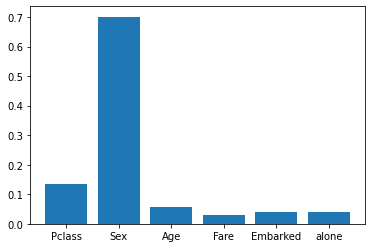

In [473]:
feature_importance=xg1.feature_importances_
plt.bar(x=X_oversample.columns,height=feature_importance)


Importance of Feature is also same 